# Introduction

The purpose of this report is to investigate the binary classification problem, how I based my deep learning model on this problem, the code I implemented to achieve this shown step-by-step and the results of it expressed via graphs and tables. The results will output the experiments I've done in the workflow. The experiments will attempt to improve the networks precision by tackling whatever problems that I identify. I will also investigate the different hyperparameter settings and adjust certain hyperparameters so the model can be at an optimal level. As for the final part of my report, I will devise a conclusion of all my findings in a paragraph. I have chosen the IMDB dataset as my example.


# Methods

This section will consist of my workflow, where I will attempt to build a deep learning model using the IMDB dataset for the binary classification problem. I will go through this step-by-step in my workflow. Explanation of each step will be in comments within the code. The general aim of the binary classification problem is to classify elements from the training set and test set into two classes. I will also perform a series of experiments, where I will test on a small model and a large model to analyse their performances. For example, analysing the validation set can assist me in investigating how well or bad the model has fit and whether I should adjust my hyperparameters.

# Workflow

## Preparing...

In [1]:
from keras.datasets import imdb     #importing the IMDB dataset
import numpy as np                  
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt   #will allow us to create graphs and table
from keras import regularizers    #regularizers will allow us to prevent overfitting

Using TensorFlow backend.


In [2]:
((trainData, trainLabels), (testData, testLabels)) = imdb.load_data(num_words = 7500) #this keeps the top 7500 most recurrent words


In [3]:
def one_hot(sequences, dimension = 7500): #this function will reshape the trainData and testData to (25000,7500.) 
                                          #25,000 sets with 7500 elements in each. This will be set to a new variable as we do 
                                          #not need to directly change the shape of trainData and testData 
            
    results = np.zeros( (len(sequences), dimension) )  #creating an array of zeros in shape (25000,7500)
    
    for i, sequence in enumerate(sequences):  # To simplify this for loop, lets picture all numbers within each set of array acting as
        results[i,sequence] = 1.              # index numbers. These index numbers will be the location of all the zeros that will turn
                                              # into ones within the set of array you are in                                             
 
    return results                            #returns the reshaped array containing 1's and 0's 
                                              #i.e. the two classes required for binary classification

In [4]:
hh = np.array([[1,2,3,4],     
               [2,2,1,3],
               [0,2,4,3]])

print(one_hot(hh,5)) #Here is an example of how the one_hot encoding works with a small dimension of 5


trainD = one_hot(trainData)   #we will assign it to a new variable
testD = one_hot(testData)
trainL = np.asarray(trainLabels).astype('float32')  #integers within the trainLabels and testLabels array are now floating point
testL = np.asarray(testLabels).astype('float32')    #working with floating points can give us more accurate results

[[0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1.]]


## Experiment 1: Building our deep learning model

#### Small Model

In [5]:
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (7500,)))  #Dense simply means units in the layers are fully connected
model.add(layers.Dense(8, activation = 'relu')) #relu activation function follows this simple formula max(0,x) it is a very beneficial function that can reduce the likeliness of the gradient to disappear  
model.add(layers.Dense(1, activation = 'sigmoid'))  #sigmoid activation function helps create an output in range of 0 and 1. This is very useful for binary classification problem
#experiment with small units


model.compile(optimizer = optimizers.RMSprop(lr = 0.01), #a gradient based optimization technique. this is a hyperparameter we can adjust
              loss = 'binary_crossentropy',  #ideal loss function for binary classification problem
              metrics = ['accuracy'])


history1 = model.fit(trainD,                      #training data
                    trainL,                     #training label
                    validation_split = 0.4,  #validation set will be 20% of the training set i.e. 5000 samples
                    epochs = 15,          
                    batch_size =700)  #in each epoch, the batch size will iterate 25000/700 times


Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 9s 624us/step - loss: 0.5792 - acc: 0.7017 - val_loss: 0.3751 - val_acc: 0.8675
Epoch 2/15
15000/15000 [==============================] - 2s 160us/step - loss: 0.3496 - acc: 0.8617 - val_loss: 0.2927 - val_acc: 0.8855
Epoch 3/15
15000/15000 [==============================] - 2s 156us/step - loss: 0.2647 - acc: 0.8949 - val_loss: 0.3458 - val_acc: 0.8577
Epoch 4/15
15000/15000 [==============================] - 2s 150us/step - loss: 0.2099 - acc: 0.9206 - val_loss: 0.3169 - val_acc: 0.8796
Epoch 5/15
15000/15000 [==============================] - 2s 163us/step - loss: 0.1754 - acc: 0.9301 - val_loss: 0.3403 - val_acc: 0.8701
Epoch 6/15
15000/15000 [==============================] - 2s 153us/step - loss: 0.1660 - acc: 0.9345 - val_loss: 0.3182 - val_acc: 0.8807
Epoch 7/15
15000/15000 [==============================] - 2s 158us/step - loss: 0.1502 - acc: 0.9454 - val_loss: 0.3249 - 

In [6]:
testLoss,testAcc = model.evaluate(testD, testL)    #test set
print("loss", testLoss)
print("Acc", testAcc)

model.predict(testD)

25000/25000 [==============================] - 3s 115us/step
loss 0.5480332986235619
Acc 0.86012


array([[2.3491652e-01],
       [9.9999988e-01],
       [1.8704685e-04],
       ...,
       [2.6850648e-02],
       [9.6510192e-03],
       [2.0380283e-03]], dtype=float32)

#### Large Model

In [7]:
model = models.Sequential()
model.add(layers.Dense(70, activation = 'relu', input_shape = (7500,))) 
model.add(layers.Dense(70, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))  
#experiment with large units


model.compile(optimizer = optimizers.RMSprop(lr = 0.01),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


history2 = model.fit(trainD,                      
                    trainL,
                    validation_split = 0.40,
                    epochs = 15,
                    batch_size =700)  

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 3s 216us/step - loss: 0.8912 - acc: 0.6667 - val_loss: 0.5400 - val_acc: 0.7502
Epoch 2/15
15000/15000 [==============================] - 3s 190us/step - loss: 0.3749 - acc: 0.8400 - val_loss: 0.2754 - val_acc: 0.8897
Epoch 3/15
15000/15000 [==============================] - 3s 195us/step - loss: 0.2770 - acc: 0.8901 - val_loss: 0.2664 - val_acc: 0.8910
Epoch 4/15
15000/15000 [==============================] - 3s 195us/step - loss: 0.1801 - acc: 0.9251 - val_loss: 0.3120 - val_acc: 0.8837
Epoch 5/15
15000/15000 [==============================] - 3s 188us/step - loss: 0.1869 - acc: 0.9202 - val_loss: 0.3328 - val_acc: 0.8857
Epoch 6/15
15000/15000 [==============================] - 3s 192us/step - loss: 0.1187 - acc: 0.9527 - val_loss: 0.4882 - val_acc: 0.8668
Epoch 7/15
15000/15000 [==============================] - 3s 185us/step - loss: 0.0938 - acc: 0.9619 - val_loss: 0.9772 - 

In [8]:
testLoss,testAcc = model.evaluate(testD, testL)    #test set
print("loss", testLoss)
print("Acc", testAcc)

model.predict(testD)

25000/25000 [==============================] - 3s 137us/step
loss 1.0769049128362536
Acc 0.86532


array([[8.6539245e-01],
       [1.0000000e+00],
       [8.4211509e-12],
       ...,
       [6.7273741e-06],
       [1.7513695e-06],
       [6.9968955e-06]], dtype=float32)

### Investigate different hyperparameter settings

Hyperparameters are parameters or variables that are set before training begins. It can shape the network structure and controls how the network should be trained. Just below is a list of different hyperparameters that we can find in Keras.

<b>Learning Rate:</b> manages how much we are changing the weights of the network with regards to the loss gradient

<b>Batch Size:</b> the whole dataset cannot be passed into the network at once, so we split the dataset into batches. For example, the dataset I'm using will be 25,000. And let's say our batch size is 700. In each epoch, the batch size will iterate 25000/700 times.

<b>Number of hidden layers:</b> correct number of layers should prevent overfitting, but too many layers can risk overfitting.

<b>Units in layers:</b> the more units you add to each layer, the number of learnable parameters increase in the model. The correct number of units will depend on what kind of neural network your using

<b>Optimizer:</b> an optimization algorithm is something that is executed repeatedly by comparing different solutions until the best solution is found. Examples in Keras include RMSprop, Adam, SGD (stochastic gradient descent) etc.

<b>Epoch:</b> entire training data passed from the network

<b>Activation function:</b> it interprets the output of a neuron after given an input or inputs. Then, that output is used as an input for the following neuron. This repeats on and on until a optimal solution is found. 

### Adjustments made to the hyperparameters

Below, their is a table showing all the adjustments I will make to the hyperparameters for experiment 2. I have researched and investigated through trial and error as to which will be the best changes for my model.



|  Hyperparameters    | Experiment 1| Experiment 2   |Reason         |
|------|------|------|------|
| Learning Rate:|0.01| 0.0007|The learning rate was slightly too high for the first experiment, causing <br> the deep learning model to behave undesirably (can be seen clearly <br>in the graphs under results section.)      |
|   Batch Size:   | 700| 200  |Reducing to mini-batch sizes can cut down on total training time|
|   Units in the layers for small model:   | 8| 12  |To investigate how it performs in a slighter bigger, but small network <br> capacity              |
|   Units in the layers for large model:   | 70| 80  |To investigate how it performs in a bigger network capacity      |
|   Optimizer:   | RMSprop| Adamax  |Based on trial and error with different optimizers, Adamax worked the <br> best out of all the others |
|   Epochs:   | 15| 30  |Epochs have been increased for the next experiment so I can find out <br> if the validation set begins to degrade after going through a greater <br> number of epochs.                |



## Experiment 2: Adjusting hyperparameters and applying regularization

#### Small Model

In [9]:
model = models.Sequential()
model.add(layers.Dense(12, activation = 'relu', input_shape = (7500,),kernel_regularizer = regularizers.l2(0.000004))) #adjusted hyperparameter and applied L2 regularization
model.add(layers.Dense(12,activation = 'relu',kernel_regularizer = regularizers.l2(0.3))) #adjusted hyperparameter and applied L2 regularization
model.add(layers.Dense(1, activation = 'sigmoid'))  
#experiment with small units


model.compile(optimizer = optimizers.Adamax(lr = 0.0007), #adjusted hyperparameters
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


history3 = model.fit(trainD, 
                    trainL,
                    validation_split = 0.4,
                    epochs = 30, #adjusted hyperparameter
                    batch_size =200)  #adjusted hyperparameter

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 3s 193us/step - loss: 3.5948 - acc: 0.5612 - val_loss: 3.0992 - val_acc: 0.6614
Epoch 2/30
15000/15000 [==============================] - 3s 171us/step - loss: 2.6980 - acc: 0.7494 - val_loss: 2.3335 - val_acc: 0.7864
Epoch 3/30
15000/15000 [==============================] - 2s 166us/step - loss: 2.0322 - acc: 0.8383 - val_loss: 1.7713 - val_acc: 0.8468
Epoch 4/30
15000/15000 [==============================] - 2s 159us/step - loss: 1.5436 - acc: 0.8717 - val_loss: 1.3594 - val_acc: 0.8584
Epoch 5/30
15000/15000 [==============================] - 2s 164us/step - loss: 1.1861 - acc: 0.8845 - val_loss: 1.0626 - val_acc: 0.8647
Epoch 6/30
15000/15000 [==============================] - 3s 168us/step - loss: 0.9287 - acc: 0.8907 - val_loss: 0.8494 - val_acc: 0.8734
Epoch 7/30
15000/15000 [==============================] - 2s 164us/step - loss: 0.7443 - acc: 0.8984 - val_loss: 0.6988 - 

In [10]:
testLoss,testAcc = model.evaluate(testD, testL)    #test set
print("loss", testLoss)
print("Acc", testAcc)

model.predict(testD)

25000/25000 [==============================] - 2s 99us/step
loss 0.34098460043907164
Acc 0.88248


array([[0.28912306],
       [0.9925593 ],
       [0.26666152],
       ...,
       [0.14389804],
       [0.08087581],
       [0.3921664 ]], dtype=float32)

The test set for the small model in this experiment has improved. The loss has reduced drastically because in experiment 1, the test loss was ≈ 0.7, but in our second try the test loss has now minimized to ≈ 0.34.

#### Large Model

In [11]:
model = models.Sequential()
model.add(layers.Dense(80, activation = 'relu', input_shape = (7500,),kernel_regularizer = regularizers.l2(0.000004))) #adjusted hyperparameter and applied L2 regularization
model.add(layers.Dense(80,activation = 'relu',kernel_regularizer = regularizers.l2(0.3))) #adjusted hyperparameter and applied L2 regularization
model.add(layers.Dense(1, activation = 'sigmoid'))  
#experiment with small units


model.compile(optimizer = optimizers.Adamax(lr = 0.0007), #adjusted hyperparameters
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


history4 = model.fit(trainD, 
                    trainL,
                    validation_split = 0.4,
                    epochs = 30, #adjusted hyperparameter
                    batch_size =200)  #adjusted hyperparameter

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 5s 305us/step - loss: 16.9945 - acc: 0.7850 - val_loss: 11.0287 - val_acc: 0.8529
Epoch 2/30
15000/15000 [==============================] - 4s 261us/step - loss: 7.6757 - acc: 0.8797 - val_loss: 5.0721 - val_acc: 0.8745
Epoch 3/30
15000/15000 [==============================] - 4s 248us/step - loss: 3.5506 - acc: 0.8977 - val_loss: 2.4032 - val_acc: 0.8809
Epoch 4/30
15000/15000 [==============================] - 4s 255us/step - loss: 1.7001 - acc: 0.9098 - val_loss: 1.2168 - val_acc: 0.8836
Epoch 5/30
15000/15000 [==============================] - 4s 255us/step - loss: 0.8819 - acc: 0.9163 - val_loss: 0.7031 - val_acc: 0.8852
Epoch 6/30
15000/15000 [==============================] - 4s 272us/step - loss: 0.5267 - acc: 0.9241 - val_loss: 0.4923 - val_acc: 0.8843
Epoch 7/30
15000/15000 [==============================] - 4s 253us/step - loss: 0.3734 - acc: 0.9289 - val_loss: 0.3999 

In [12]:
testLoss,testAcc = model.evaluate(testD, testL)    #test set
print("loss", testLoss)
print("Acc", testAcc)
model.predict(testD)

25000/25000 [==============================] - 4s 168us/step
loss 0.40067299958229063
Acc 0.86796


array([[0.24611923],
       [0.9999771 ],
       [0.00529341],
       ...,
       [0.17311835],
       [0.01787535],
       [0.13977198]], dtype=float32)

The test set for the large model in this experiment has improved. Like for the small model, The loss has reduced drastically because in experiment 1 the test loss was ≈ 1.26, but in our second try the test loss has now minimized to ≈ 0.4

# Results

## Experiment 1: results

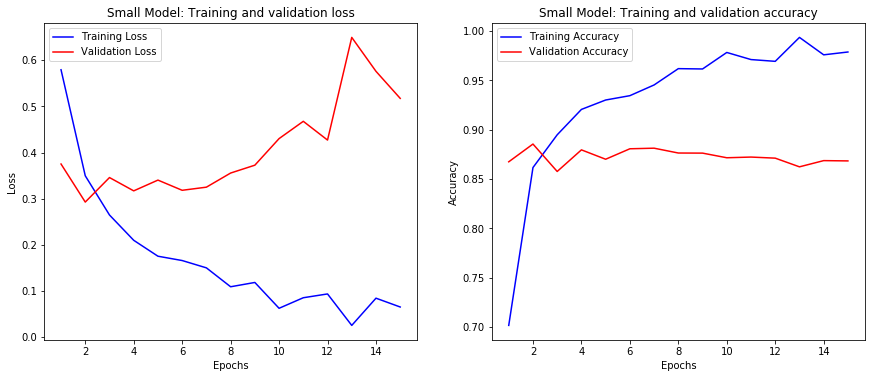

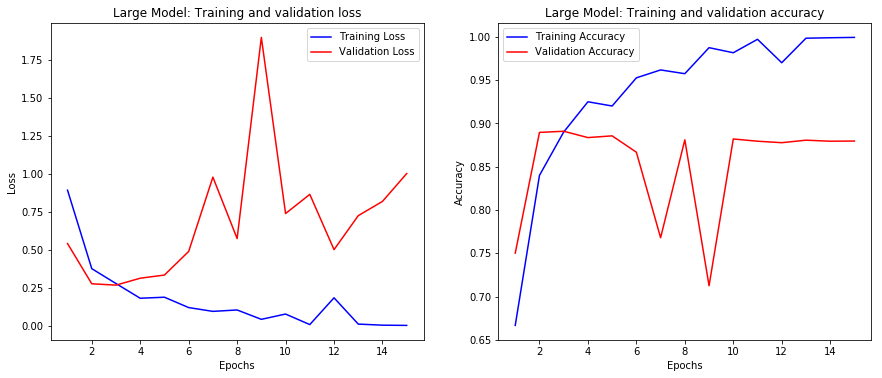

In [13]:
history1_dict = history1.history
loss = history1_dict['loss']
val_loss = history1_dict['val_loss']

acc = history1_dict['acc']
val_acc = history1_dict['val_acc']


epochs = range(1, len(loss) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label = 'Training Loss')  
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')  #this subplot should print the training loss and validation loss for 
plt.title("Small Model: Training and validation loss")      #the small model in experiment 1
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')  #this subplot should print the training accuracy and validation 
plt.title("Small Model: Training and validation accuracy")     #accuracy for the small model in experment 1
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplots_adjust(left=0.1, bottom=1.4, right=2, top=2.5, wspace=None, hspace=None)


plt.show()





history2_dict = history2.history
loss2 = history2_dict['loss']
val_loss2 = history2_dict['val_loss']
acc2 = history2_dict['acc']
val_acc2 = history2_dict['val_acc']

epochs2 = range(1, len(loss2) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs2, loss2, 'b', label = 'Training Loss')
plt.plot(epochs2, val_loss2, 'r', label = 'Validation Loss') #this subplot should print the training loss and validation loss for
plt.title("Large Model: Training and validation loss")       #the large model in experiment 1
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs2, acc2, 'b', label = 'Training Accuracy')
plt.plot(epochs2, val_acc2, 'r', label = 'Validation Accuracy') #this subplot should print the training accuracy and validation
plt.title("Large Model: Training and validation accuracy")      #accuracy for the large model in experment 1
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



plt.subplots_adjust(left=0.1, bottom=1.4, right=2, top=2.5, wspace=None, hspace=None)

plt.show()



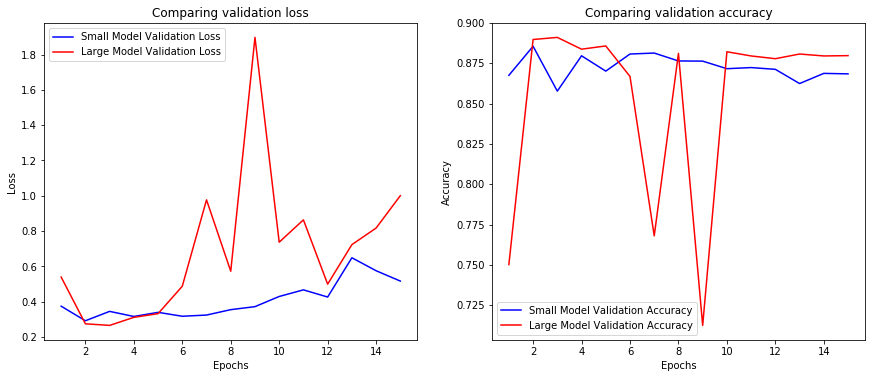

In [14]:
plt.subplot(1, 2, 1)
plt.plot(epochs, val_loss, 'b', label = 'Small Model Validation Loss')
plt.plot(epochs2, val_loss2, 'r', label = 'Large Model Validation Loss') 
plt.title("Comparing validation loss")    #this subplot should print the validation loss for both               
plt.xlabel('Epochs')                      #the large model and the small model for comparison in experiment 1
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc, 'b', label = 'Small Model Validation Accuracy')  
plt.plot(epochs2, val_acc2, 'r', label = 'Large Model Validation Accuracy')
plt.title("Comparing validation accuracy")  #this subplot should print the validation accuracy for both
plt.xlabel('Epochs')                        #the large model and the small model for comparison in experiment 1      
plt.ylabel('Accuracy')
plt.legend()



plt.subplots_adjust(left=0.1, bottom=1.4, right=2, top=2.5, wspace=None, hspace=None)

plt.show()

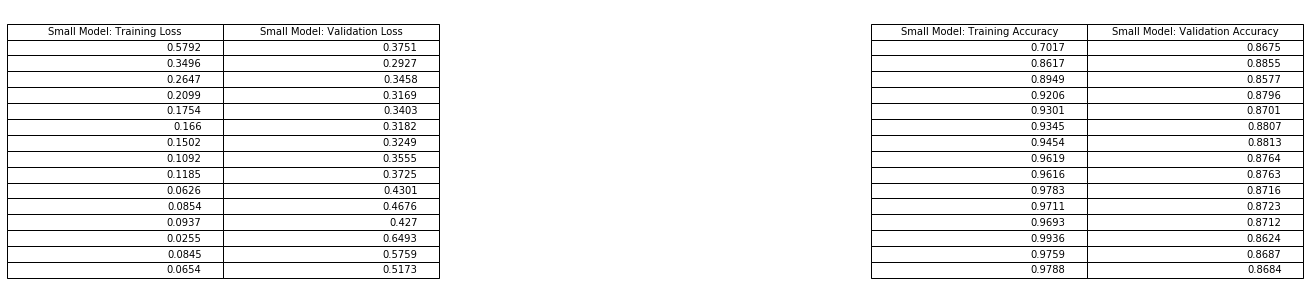

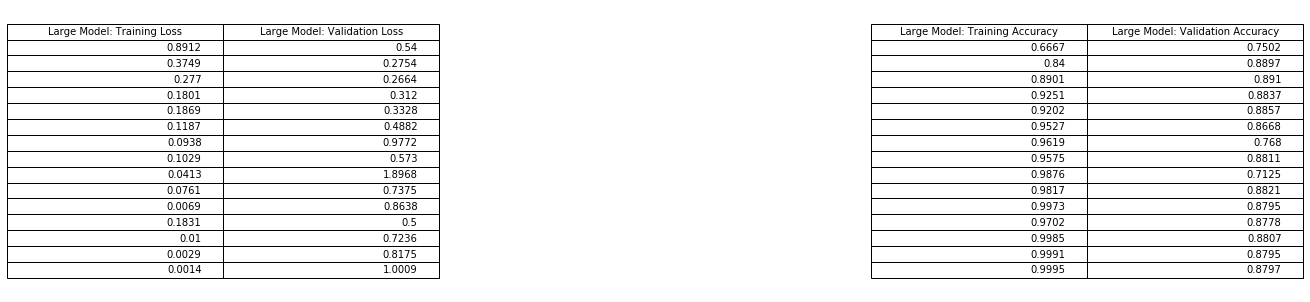

In [15]:
accuracy2 = np.empty((len(epochs),2))
error2 = np.empty((len(epochs),2))


for i in range(len(error2)):
    error2[i][0] = loss[i]
    error2[i][1] = val_loss[i]


for i in range(len(accuracy2)):
    accuracy2[i][0] = acc[i]
    accuracy2[i][1] = val_acc[i]

ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False)    
ax.yaxis.set_visible(False) 

plt.table(cellText=np.around(error2,4), colLabels=["Small Model: Training Loss","Small Model: Validation Loss"],loc = "left") 
plt.table(cellText=np.around(accuracy2,4), colLabels=["Small Model: Training Accuracy","Small Model: Validation Accuracy"],loc = "right") 

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1)

#this subplot should create two tables
#table 1: the training loss and validation loss for the small model in experiment 1
#table 2: the training accuracy and validation accuracy for the small model in experiment 1


plt.show()


accuracy2 = np.empty((len(epochs2),2))
error2 = np.empty((len(epochs2),2))


for i in range(len(error2)):
    error2[i][0] = loss2[i]
    error2[i][1] = val_loss2[i]


for i in range(len(accuracy2)):
    accuracy2[i][0] = acc2[i]
    accuracy2[i][1] = val_acc2[i]

ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

plt.table(cellText=np.around(error2,4), colLabels=["Large Model: Training Loss","Large Model: Validation Loss"],loc = "left") 

plt.table(cellText=np.around(accuracy2,4), colLabels=["Large Model: Training Accuracy","Large Model: Validation Accuracy"],loc = "right") 

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1)

#this subplot should create two tables
#table 1: the training loss and validation loss for the large model in experiment 1
#table 2: the training accuracy and validation accuracy for the large model in experiment 1

plt.show()

# Analysis of Experiment 1

The results shown in my first experiment tell us that both the small model and the large model is overfitting. This is because the validation loss is increasing and the training loss is decreasing at the same time after every epoch. From the results, it seems like the large model overfits much earlier and its validation loss is increasing at a much greater rate than the small model.

One way we can prevent overfitting and improving the network structure is by adjusting the hyperparameters. An example of a hyperparameter we can adjust is the learning rate, which manages how much we are changing the weights of the network with regards to the loss gradient. The smaller the value, the more reliable training is, but it will take longer to converge into something useful. Another example of a hyperparameter we can adjust is the number of units within each layer. A small unit would reduce the number of parameters and a large unit would increase the number of parameters. 

But the main way we can avoid overfitting is by applying a weight regularization technique. Regularization is simply any changes we make to the algorithm that is meant to minimize the generalization error, yet not its training error. The L2 weight regularization is something that can be easily implemented in Keras. It can minimize the weights to a smaller value or can turn the value/s into a zero.

In my second experiment, I have adjusted the hyperparameters to what was mentioned in the table specified in the "Method" section. I have also applied the L2 weight regularization technique to prevent overfitting. Again, I have tested with one large model and one small model to analyse the differences. 

## Experiment 2: results

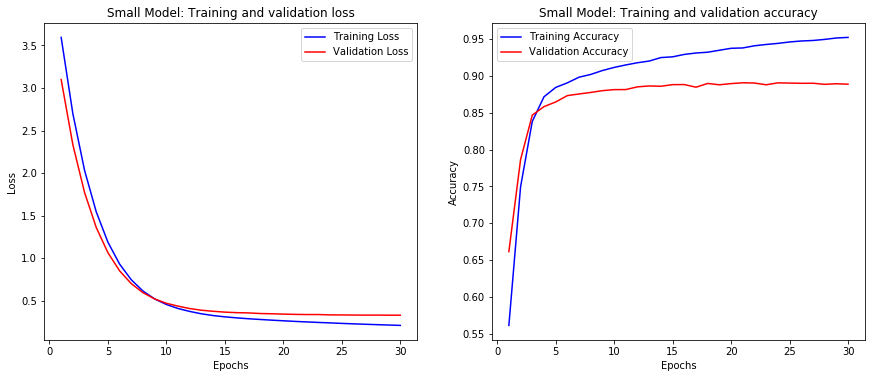

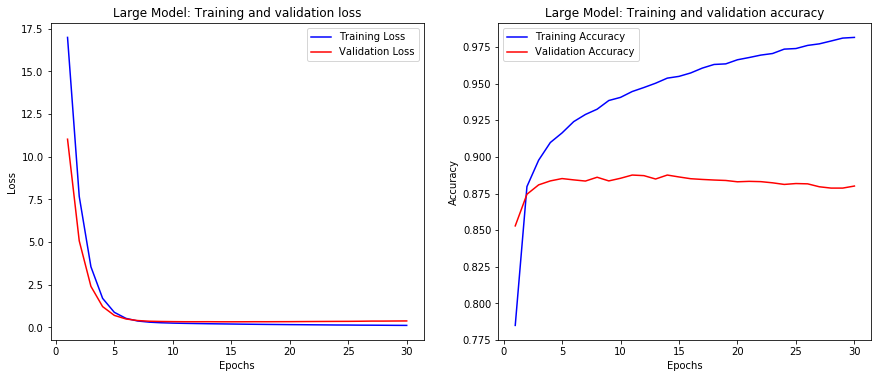

In [16]:
history3_dict = history3.history
loss3 = history3_dict['loss']
val_loss3 = history3_dict['val_loss']
acc3 = history3_dict['acc']
val_acc3 = history3_dict['val_acc']

epochs3 = range(1, len(loss3) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs3, loss3, 'b', label = 'Training Loss')
plt.plot(epochs3, val_loss3, 'r', label = 'Validation Loss') 
plt.title("Small Model: Training and validation loss")
plt.xlabel('Epochs')  #this subplot should print the training loss and validation loss for
plt.ylabel('Loss')    #the small model in experiment 2



plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs3, acc3, 'b', label = 'Training Accuracy')
plt.plot(epochs3, val_acc3, 'r', label = 'Validation Accuracy')
plt.title("Small Model: Training and validation accuracy") 
plt.xlabel('Epochs')  #this subplot should print the training accuracy and validation accuracy for 
plt.ylabel('Accuracy') #the small model in experiment 2
plt.legend()


plt.subplots_adjust(left=0.1, bottom=1.4, right=2, top=2.5, wspace=None, hspace=None)

#this subplot should create two tables
#table 1: the training loss and validation loss for the large model in experiment 1
#table 2: the training accuracy and validation accuracy for the large model in experiment 1

plt.show()





history4_dict = history4.history
loss4 = history4_dict['loss']
val_loss4 = history4_dict['val_loss']
acc4 = history4_dict['acc']
val_acc4 = history4_dict['val_acc']

epochs4 = range(1, len(loss4) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs4, loss4, 'b', label = 'Training Loss')
plt.plot(epochs4, val_loss4, 'r', label = 'Validation Loss')
plt.title("Large Model: Training and validation loss")
plt.xlabel('Epochs')  #this subplot should print the training loss and validation loss for
plt.ylabel('Loss')    #the large model in experiment 2
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs4, acc4, 'b', label = 'Training Accuracy')
plt.plot(epochs4, val_acc4, 'r', label = 'Validation Accuracy')
plt.title("Large Model: Training and validation accuracy")
plt.xlabel('Epochs') #this subplot should print the training accuracy and validation accuracy for
plt.ylabel('Accuracy') #the large model in experiment 2
plt.legend()


plt.subplots_adjust(left=0.1, bottom=1.4, right=2, top=2.5, wspace=None, hspace=None)

#this subplot should create two tables
#table 1: the training loss and validation loss for the large model in experiment 1
#table 2: the training accuracy and validation accuracy for the large model in experiment 1


plt.show()


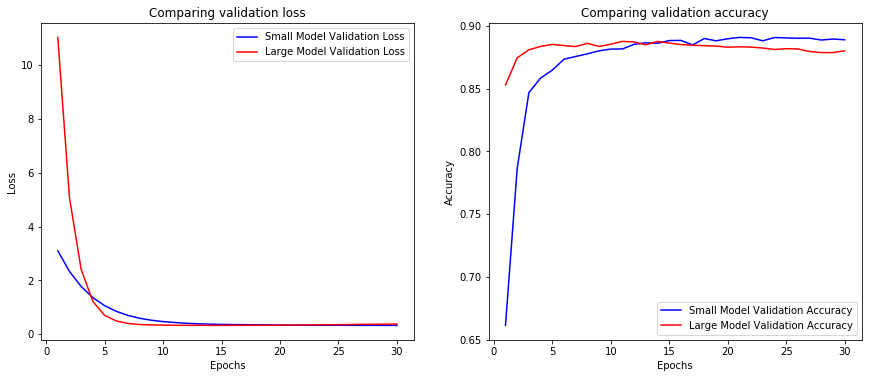

In [17]:
plt.subplot(1, 2, 1)
plt.plot(epochs3, val_loss3, 'b', label = 'Small Model Validation Loss')
plt.plot(epochs4, val_loss4, 'r', label = 'Large Model Validation Loss')
plt.title("Comparing validation loss")
plt.xlabel('Epochs')  #this subplot should print the validation loss for both
plt.ylabel('Loss')    #the large model and the small model for comparison in experiment 2
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs3, val_acc3, 'b', label = 'Small Model Validation Accuracy')
plt.plot(epochs4, val_acc4, 'r', label = 'Large Model Validation Accuracy')
plt.title("Comparing validation accuracy")
plt.xlabel('Epochs')    #this subplot should print the validation accuracy for both
plt.ylabel('Accuracy')  #the large model and the small model for comparison in experiment 2
plt.legend()



plt.subplots_adjust(left=0.1, bottom=1.4, right=2, top=2.5, wspace=None, hspace=None)

plt.show()

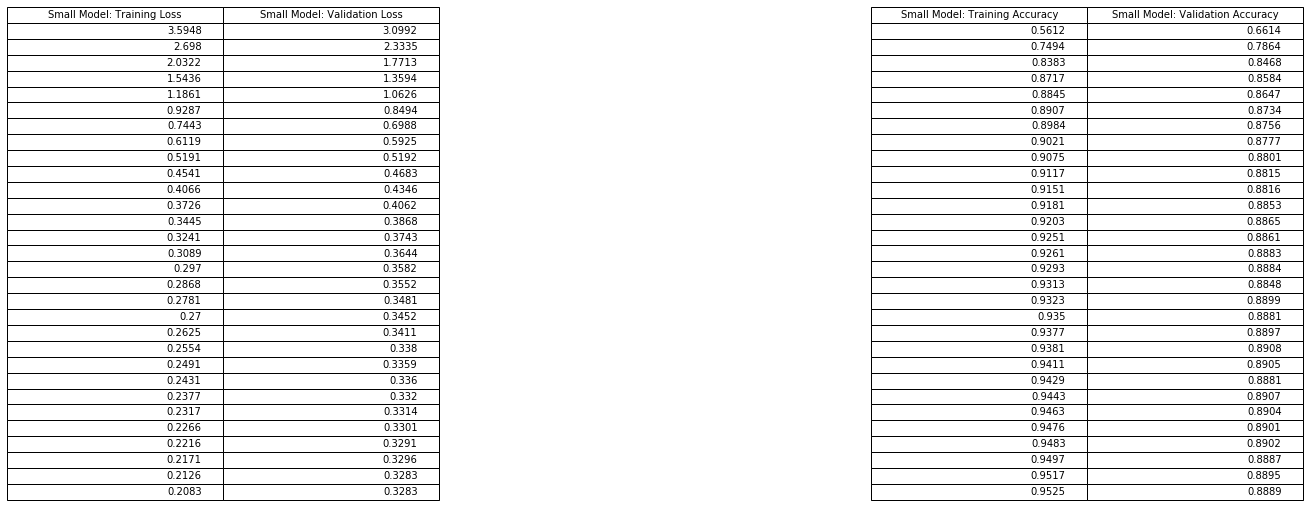

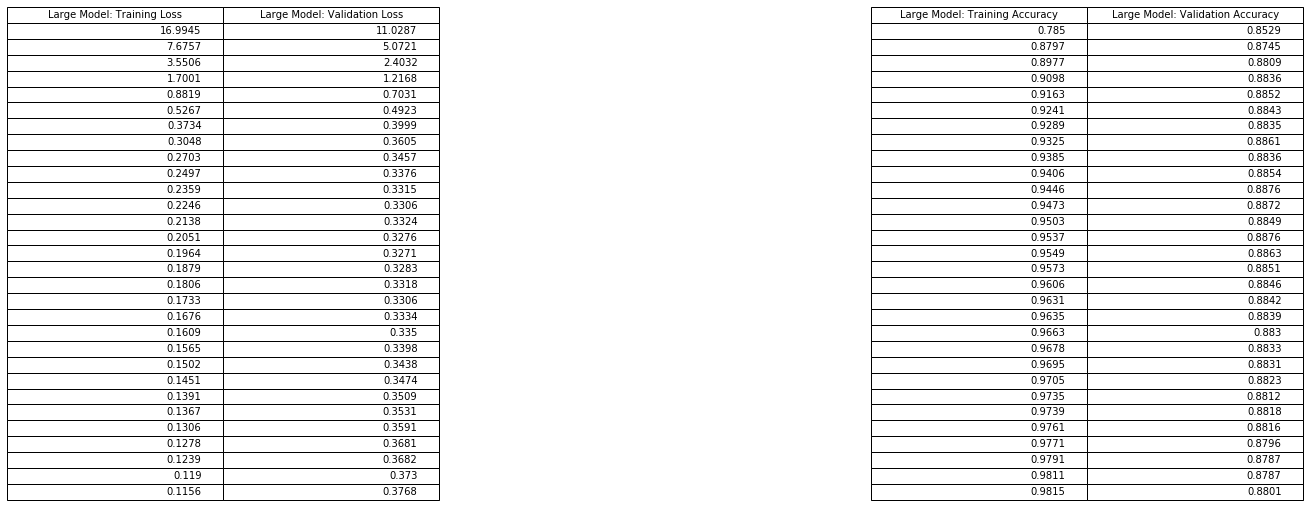

In [18]:
accuracy2 = np.empty((len(epochs3),2))
error2 = np.empty((len(epochs3),2))


for i in range(len(error2)):
    error2[i][0] = loss3[i]
    error2[i][1] = val_loss3[i]


for i in range(len(accuracy2)):
    accuracy2[i][0] = acc3[i]
    accuracy2[i][1] = val_acc3[i]

ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

plt.table(cellText=np.around(error2,4), colLabels=["Small Model: Training Loss","Small Model: Validation Loss"],loc = "left") 
plt.table(cellText=np.around(accuracy2,4), colLabels=["Small Model: Training Accuracy","Small Model: Validation Accuracy"],loc = "right") 

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1)

#this subplot should create two tables
#table 1: the training loss and validation loss for the small model in experiment 2
#table 2: the training accuracy and validation accuracy for the small model in experiment 2

plt.show()


accuracy2 = np.empty((len(epochs4),2))
error2 = np.empty((len(epochs4),2))


for i in range(len(error2)):
    error2[i][0] = loss4[i]
    error2[i][1] = val_loss4[i]


for i in range(len(accuracy2)):
    accuracy2[i][0] = acc4[i]
    accuracy2[i][1] = val_acc4[i]

ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

plt.table(cellText=np.around(error2,4), colLabels=["Large Model: Training Loss","Large Model: Validation Loss"],loc = "left") 

plt.table(cellText=np.around(accuracy2,4), colLabels=["Large Model: Training Accuracy","Large Model: Validation Accuracy"],loc = "right") 

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.1)

#this subplot should create two tables
#table 1: the training loss and validation loss for the large model in experiment 2
#table 2: the training accuracy and validation accuracy for the large model in experiment 2

plt.show()


# Analysis of experiment 2

From the results in experiment 2, I can a see a massive improvement. The graphs illustrate that I managed to prevent overfitting for the small model because both the validation loss and the training loss are low, but the validation loss is slightly higher. This is a definition of a good fitted model. For the large model, the validation loss starts at a very high number and seems to fall rapidly between epoch 1 - 7 to a point where it is much lower than of the small model. All seems to go well until it gets halfway, where the validation loss starts to slightly increase after each epoch. But nevertheless a much better result in comparison to our first experiment. The L2 weight regularization technique played a massive part in achieving better results. The adjustments of hyperparameters also helped.<br>

The validation accuracy for the small model seems to be slightly better than the large model. But, the validation accuracy for both models seems to remain constant throughout the test. Their could be many reasons for this, for example it could be that the model has learnt everything it needs to from the validation set. <br>

# Evaluation

Just to summarize, I managed to create a binary classification model in my workflow shown step-by-step as to how it was built. I then carried out two experiments. In my first and second experiment, I tested on a small model and a large model. The results from the two models within my first experiment showed that the validation loss was increasing and the training loss was decreasing after every epoch. From this analysis I realised that the models were overfitting, so for the second experiment I decided to adjust the hyperparameters and apply the L2 weight regularization technique. The results from this experiment showed that I was able to prevent overfitting for the small model as the validation loss decreased and was slightly higher than the training loss. As for the large model, the validation loss was reducing drastically at the beginning, but it started to increase slightly halfway up until the end of the last epoch (30). Nevertheless it was a much better result in comparison to the first experiment. The test set also improved as the loss reduced drastically in experiment 2 for the two models. 

